In [1]:
# Importing labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
df = pd.read_csv("household_power_consumption.txt", sep=';',
                 na_values = '?',dtype = float ,low_memory=False,infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
# Checking Missing Values in the dataset
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
df.shape

(2075259, 7)

In [6]:
#filling the missing values with the mean
df = df.fillna(df.mean())

In [7]:
df.shape

(2075259, 7)

In [8]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [10]:
# Resampling the time series data
#daily resampling
daily_df = df.resample('D').sum()

In [11]:
print(daily_df.shape)
daily_df.head()

(1442, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [12]:
def plot_state(col_name):
    plt.figure(figsize=(10,6))
    plt.plot(daily_df.index, daily_df[col_name],'-', marker='+')
    plt.grid()
    plt.xlabel('DateTime')
    plt.ylabel(col_name)

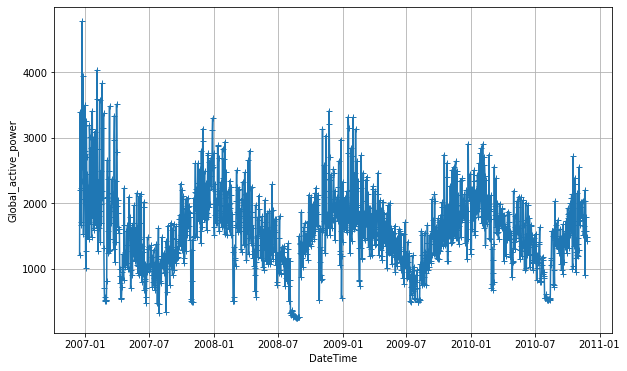

In [13]:
# plot of Global_active_power on th daily time frame
plot_state("Global_active_power")

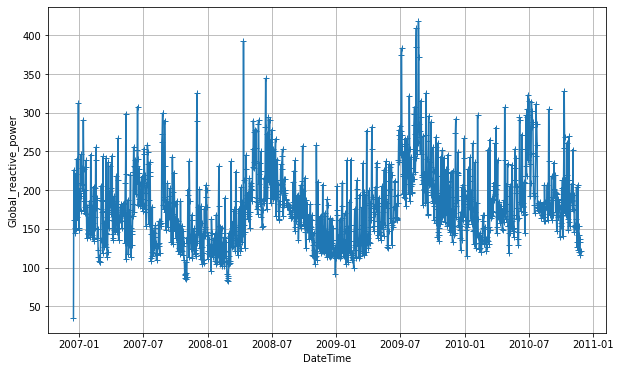

In [14]:
# plot of Global_reactive_power on th daily time frame
plot_state("Global_reactive_power")

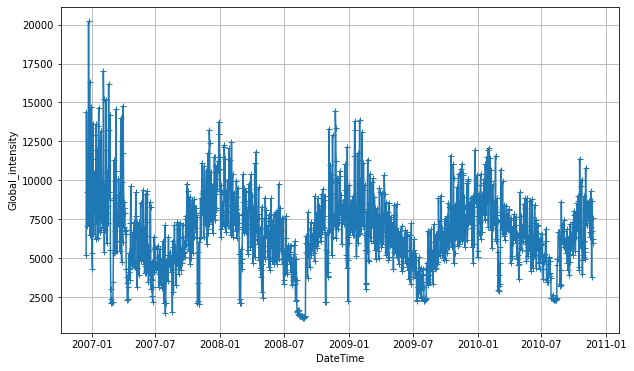

In [15]:
# plot of Global_intensity on th daily time frame
plot_state("Global_intensity")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


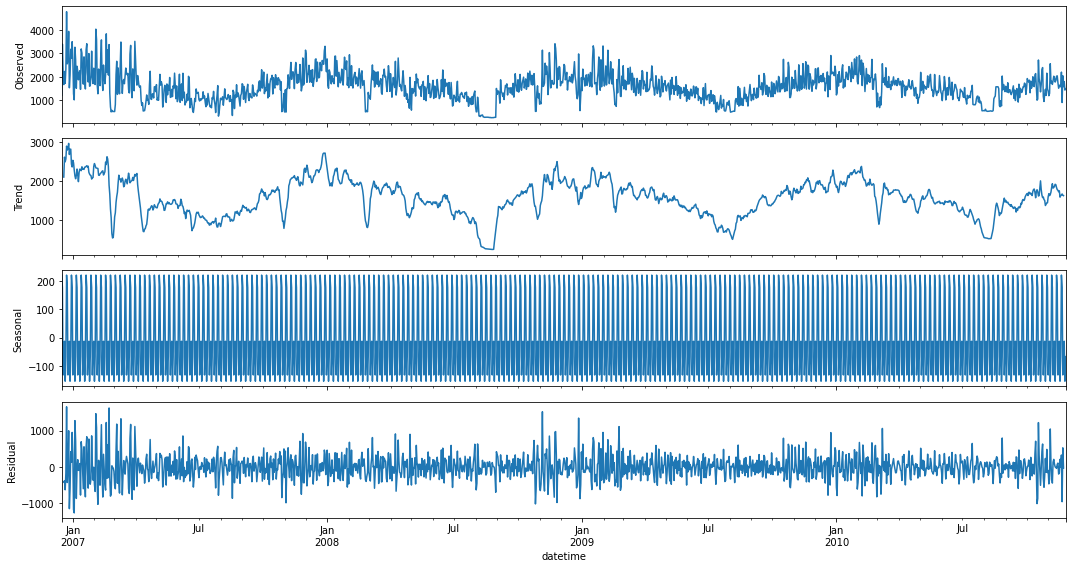

In [16]:
import statsmodels.api as sm
from pylab import rcParams

# Testing for daily time series
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(daily_df['Global_active_power'], model='additive')
decompose_series.plot()
plt.show()

In [17]:
# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

In [18]:
def adf_test(d_set):
    adf_result = adfuller(d_set, autolag='AIC')
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print(f'No. of lags used: {adf_result[2]}')
    print(f'No. of observations used : {adf_result[3]}')
    print('Critical Values:')
    for k, v in adf_result[4].items():
        print(f'   {k}: {v}') 

    p = adf_result[1]
    if p <= 0.05:
        print("It is stationary time series")
    else:
        print("It is not a stationary time series")

# this function takes a time series datframe and checks the columns that are stationary.
def get_stationarity(data):
    for i in data.columns:
        print("Column: ",i)
        adf_test(data[i])

In [19]:
 #test for stationarity for daily time series
get_stationarity(daily_df)

Column:  Global_active_power
ADF Statistic: -3.731703845267444
p-value: 0.0036886778465985066
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384
It is stationary time series
Column:  Global_reactive_power
ADF Statistic: -3.8258508782879046
p-value: 0.0026536286982084107
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384
It is stationary time series
Column:  Voltage
ADF Statistic: -2.959236896288207
p-value: 0.038880520997245836
No. of lags used: 23
No. of observations used : 1418
Critical Values:
   1%: -3.4349700122033804
   5%: -2.8635804131233096
   10%: -2.567856305330816
It is stationary time series
Column:  Global_intensity
ADF Statistic: -3.831590194938799
p-value: 0.0026001484504862508
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
 

In [20]:
# Visualising the stationary series

In [21]:
def visualise_state(col_name):
    plt.figure(figsize=(10,6))
    original = plt.plot(daily_df.index, daily_df[col_name],'--', marker='+', color = 'green',label = 'original')
    mean = plt.plot(color = 'red')
    plt.grid()
    plt.legend(loc = 'best')
    plt.xlabel('Datetime')
    plt.ylabel(col_name)

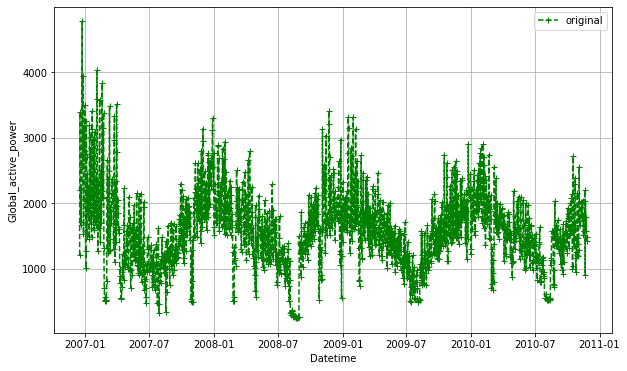

In [22]:
# plotting for Global_active_power
visualise_state("Global_active_power")

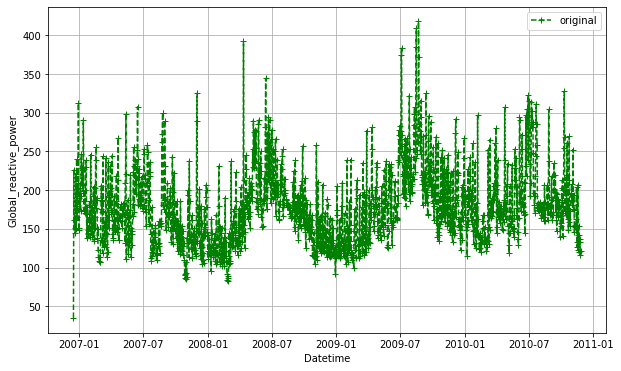

In [23]:
# plotting for Global_reactive_power
visualise_state("Global_reactive_power")

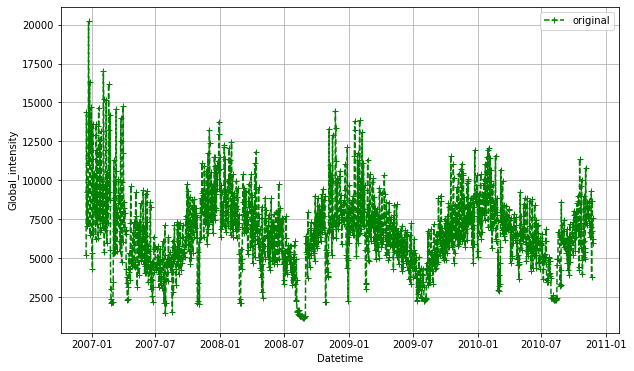

In [24]:
# plotting for Global_intensity
visualise_state("Global_intensity")

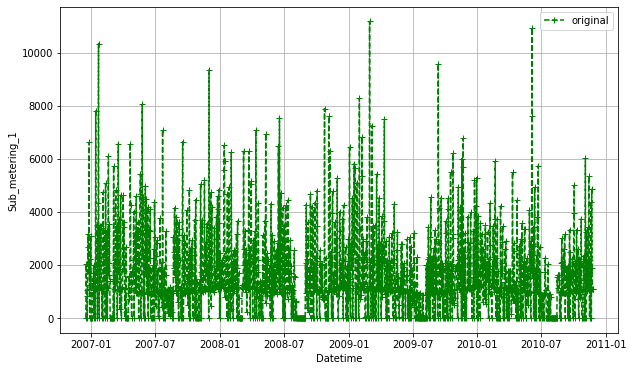

In [25]:
# plotting for sub_metring_1
visualise_state("Sub_metering_1")

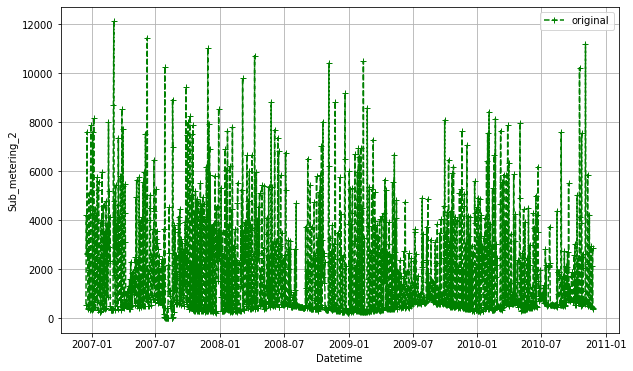

In [26]:
# plotting for sub_metring_2
visualise_state("Sub_metering_2")

In [27]:
# FB Prophet Model
from fbprophet import Prophet

In [28]:
#we have to reset the datetime index and assign it as a column in the new dataframe
daily_df.reset_index(inplace=True)
prophet_daily = daily_df[['datetime','Global_active_power']]

In [29]:
#renaming the columns 
prophet_daily = prophet_daily.rename(columns = {'datetime': 'ds','Global_active_power': 'y'})
print(prophet_daily.shape)
prophet_daily.head()

(1442, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [30]:
train_set, test_set  = prophet_daily.iloc[:1077,:], prophet_daily.iloc[1077:,:]

In [31]:
#fitting the model to the dataset
model = Prophet(daily_seasonality=True)
model.fit(train_set)
pred = model.predict(test_set)

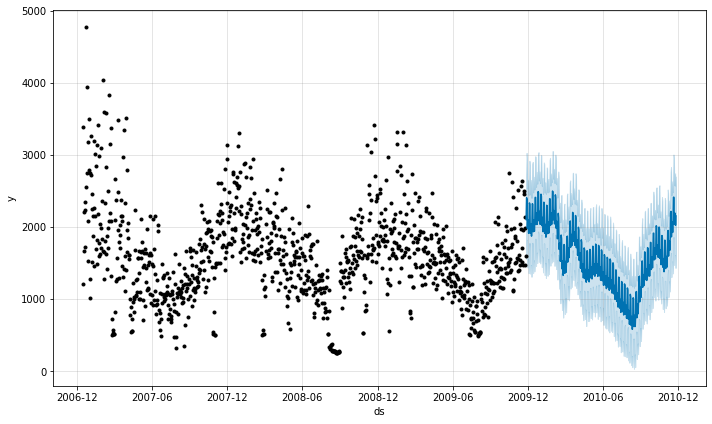

In [32]:
model.plot(pred)
plt.show()

In [33]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set['y']),np.array(pred['yhat'])))
print(f'RMSE: {round(rmse,2)}')

RMSE: 374.69


In [34]:
# Define a model for the calculation of MAPE
def Metric(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) *100
mape = Metric(test_set['y'],pred['yhat'])
print(f'MAPE: {round(mape,2)}')

MAPE: 20.83


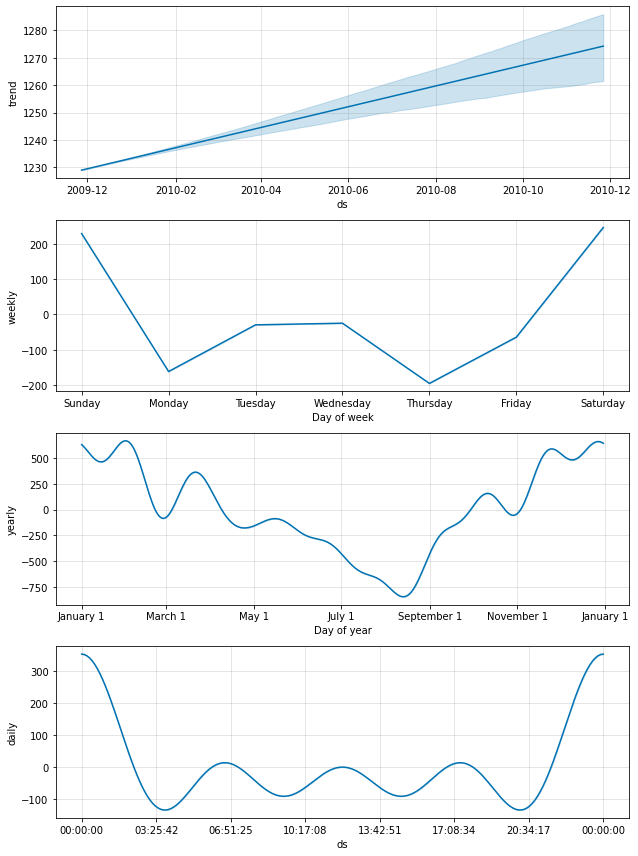

In [35]:
model.plot_components(pred)
plt.show()